In [1]:
!pip install --upgrade geopandas
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import libraries that we will use to display maps!

We'll be using `pandas` and `geopandas` today.  These are libraries that allow us to do data science and to do mapping.

In [2]:
import geopandas as gpd
import pandas as pd
import mapclassify
import matplotlib.pyplot as plt

### Let's get some data!

The data we are going to use come from the Ontario Community Health Profiles project. Let's check it out!

https://www.ontariohealthprofiles.ca/index.php 

We also want to get a 

https://github.com/mwidener/rexdale 

### Load a 'geojson' file into a variable we call "nbrhd"

Once the variable is set, we can then use a function called `.head()` to look at the first few rows.

In [3]:
nbrhd = gpd.read_file("Toronto_Neighbourhoods.geojson")  #load spatial file into a variable called nbrhd
nbrhd.head() #peak at the top 5 rows in the data we loaded.

,AREA_ATTR_ID,AREA_DESC,AREA_ID,AREA_LONG_CODE,AREA_NAME,AREA_SHORT_CODE,CLASSIFICATION,CLASSIFICATION_CODE,LATITUDE,LONGITUDE,OBJECTID,PARENT_AREA_ID,Shape__Area,Shape__Length,X,Y,_id,geometry
0,26005521,Casa Loma (96),2480141,096,Casa Loma (96),096,NaN,NaN,NaN,NaN,17545105,NaN,3.678385e+06,8214.176485,NaN,NaN,1,"POLYGON ((-79.41469 43.67391, -79.41485 43.674..."
1,26005520,Annex (95),2480140,095,Annex (95),095,NaN,NaN,NaN,NaN,17545121,NaN,5.337192e+06,10513.883143,NaN,NaN,2,"POLYGON ((-79.39414 43.66872, -79.39588 43.668..."
2,26005519,Caledonia-Fairbank (109),2480139,109,Caledonia-Fairbank (109),109,NaN,NaN,NaN,NaN,17545137,NaN,2.955857e+06,6849.911724,NaN,NaN,3,"POLYGON ((-79.46021 43.68156, -79.46044 43.681..."
3,26005444,Woodbine Corridor (64),2480064,064,Woodbine Corridor (64),064,NaN,NaN,NaN,NaN,17545153,NaN,3.052518e+06,7512.966773,NaN,NaN,4,"POLYGON ((-79.31485 43.66674, -79.31660 43.666..."
4,26005443,Lawrence Park South (103),2480063,103,Lawrence Park South (103),103,NaN,NaN,NaN,NaN,17545169,NaN,6.211341e+06,13530.370002,NaN,NaN,5,"POLYGON ((-79.41096 43.70408, -79.41165 43.703..."


In [4]:
#get geodataframe ready - don't worry too much about this!

important_spat_cols = nbrhd.columns[[4, 5, 17]] #say what columns we like - we want to keep the 5th, 6th, and 18th columns
nbrhd_simple = nbrhd.copy() #make sure we don't overwrite the original data!
nbrhd_simple = nbrhd_simple[important_spat_cols] #get rid of the extra columns
nbrhd_simple['NeighbID'] = nbrhd['AREA_SHORT_CODE'].astype(int) #convert text numbers to real numbers for later
nbrhd_simple.head()

,AREA_NAME,AREA_SHORT_CODE,geometry,NeighbID
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",96
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",95
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",109
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",64
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",103


<Axes: >

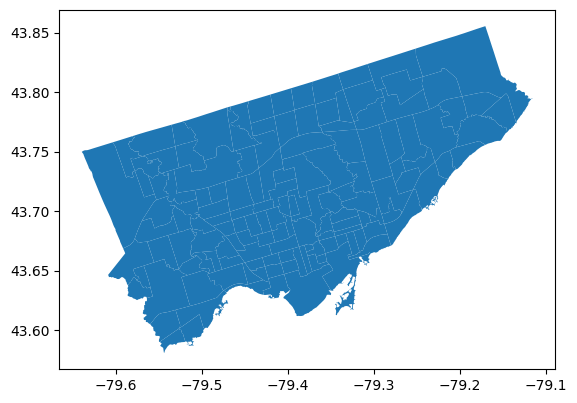

In [5]:
nbrhd.plot()

### This is great! But it's just a map of Toronto. 

Booooooring. 

We want to bring the health data into this map. How do we do that? 

Well we need to load the file with the health data into python first. 

In [6]:
toronto_data = pd.read_csv('toronto_health_data_2017.csv')
toronto_data.head()

,NeighbID,Name,prev_diab_20up,prev_asthma_0up,prev_mh_20up
0,1,West Humber-Clairville,18.2,15.9,7.2
1,2,Mount Olive-Silverstone-Jamestown,18.4,14.6,8.1
2,3,Thistletown-Beaumond Heights,17.7,16.0,8.4
3,4,Rexdale-Kipling,17.5,16.7,9.0
4,5,Elms-Old Rexdale,17.0,19.0,8.9


### OK let's bring the data file together with the spatial file

In [7]:
nbrhd_simple = nbrhd_simple.merge(toronto_data, on="NeighbID")
nbrhd_simple.head()

,AREA_NAME,AREA_SHORT_CODE,geometry,NeighbID,Name,prev_diab_20up,prev_asthma_0up,prev_mh_20up
0,Casa Loma (96),096,"POLYGON ((-79.41469 43.67391, -79.41485 43.674...",96,Casa Loma,8.1,13.6,9.3
1,Annex (95),095,"POLYGON ((-79.39414 43.66872, -79.39588 43.668...",95,Annex,7.4,12.4,9.7
2,Caledonia-Fairbank (109),109,"POLYGON ((-79.46021 43.68156, -79.46044 43.681...",109,Caledonia-Fairbank,14.3,16.6,9.8
3,Woodbine Corridor (64),064,"POLYGON ((-79.31485 43.66674, -79.31660 43.666...",64,Woodbine Corridor,8.9,14.7,10.3
4,Lawrence Park South (103),103,"POLYGON ((-79.41096 43.70408, -79.41165 43.703...",103,Lawrence Park South,6.2,14.7,8.3


Great - everything is together now. Can we map something interesting now? What about asthma?

To do this we can add an argument to the `plot()` function.

We say plot ... AND ... color the neighborhoods with the values stored in the `prev_asthma_0up` column.

<Axes: >

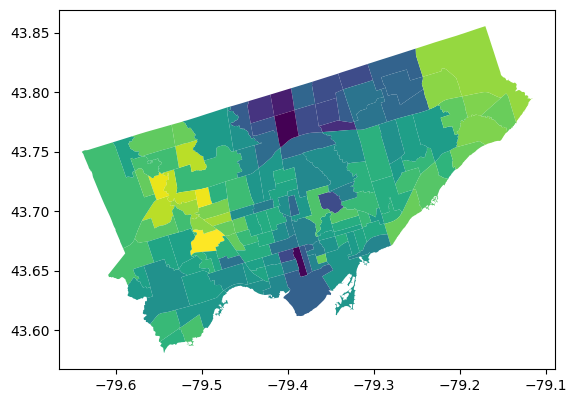

In [8]:
nbrhd_simple.plot(column='prev_asthma_0up')

Pretty!

But ... what does it mean? What's missing? What don't we know? 

We should add some more info... and we can customize things. 

For one - we can change the color scheme by using a `cmap` argument. https://matplotlib.org/stable/tutorials/colors/colormaps.html 

<Axes: >

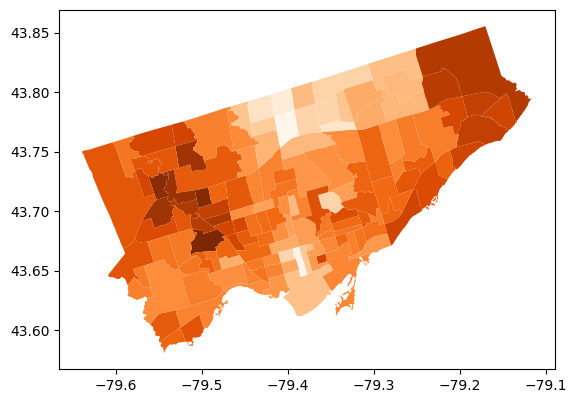

In [9]:
nbrhd_simple.plot(column='prev_asthma_0up', cmap = 'Oranges')

What about a map legend? 

Map legends tell us what we're looking at on a map. For example, what does a light color mean vs. a dark color? 

<Axes: >

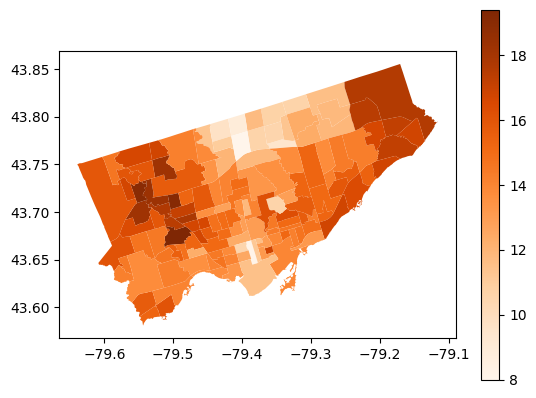

In [10]:
nbrhd_simple.plot(column='prev_asthma_0up', cmap = 'Oranges', legend = True)

We can go event fancier. What if we divide the prevelance of asthma data into four categories - also known as 'quartiles'? 

Geopandas let's you do lots of map classification. 'quantiles' is just one of a few options. 

To do this we need to add even more arguments to the `plot.()` function. In this case, we add `classification = 'quantiles'` and `k=4` to say we want quartiles.

<Axes: >

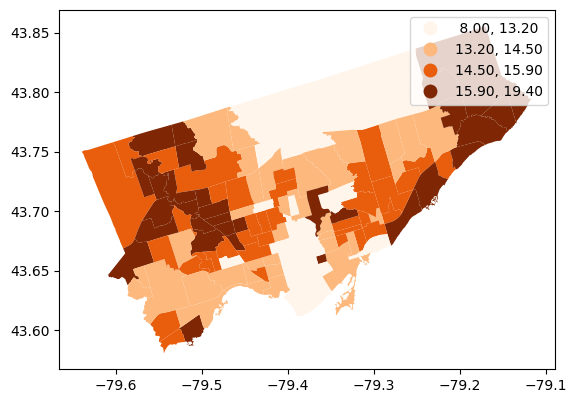

In [11]:
nbrhd_simple.plot(column='prev_asthma_0up', scheme='quantiles', 
                  k=4, cmap='Oranges',  legend=True)

Where am I getting all this info? You can find information about how a function like `plot()` works in something called an API. It takes a long time to learn all this stuff, but once you get going it only gets easier!

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html


<Axes: >

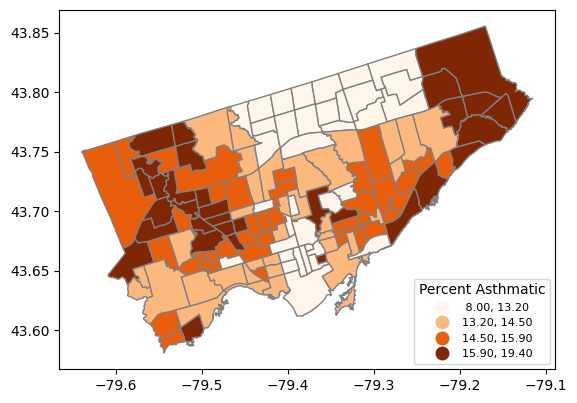

In [12]:
fig, axes = plt.subplots(1,1) #tell python we want to have more control over our figure
nbrhd_simple.plot(column='prev_asthma_0up', scheme='quantiles', 
                  k=4, cmap='Oranges', edgecolor='grey', ax=axes, legend=True,
                  legend_kwds={'loc': 4, 'title': 'Percent Asthmatic',
                               'title_fontsize': 10,'fontsize': 8})

Let's try copying and pasting the code in the last cell and changing the column to the mental health prevelance column.

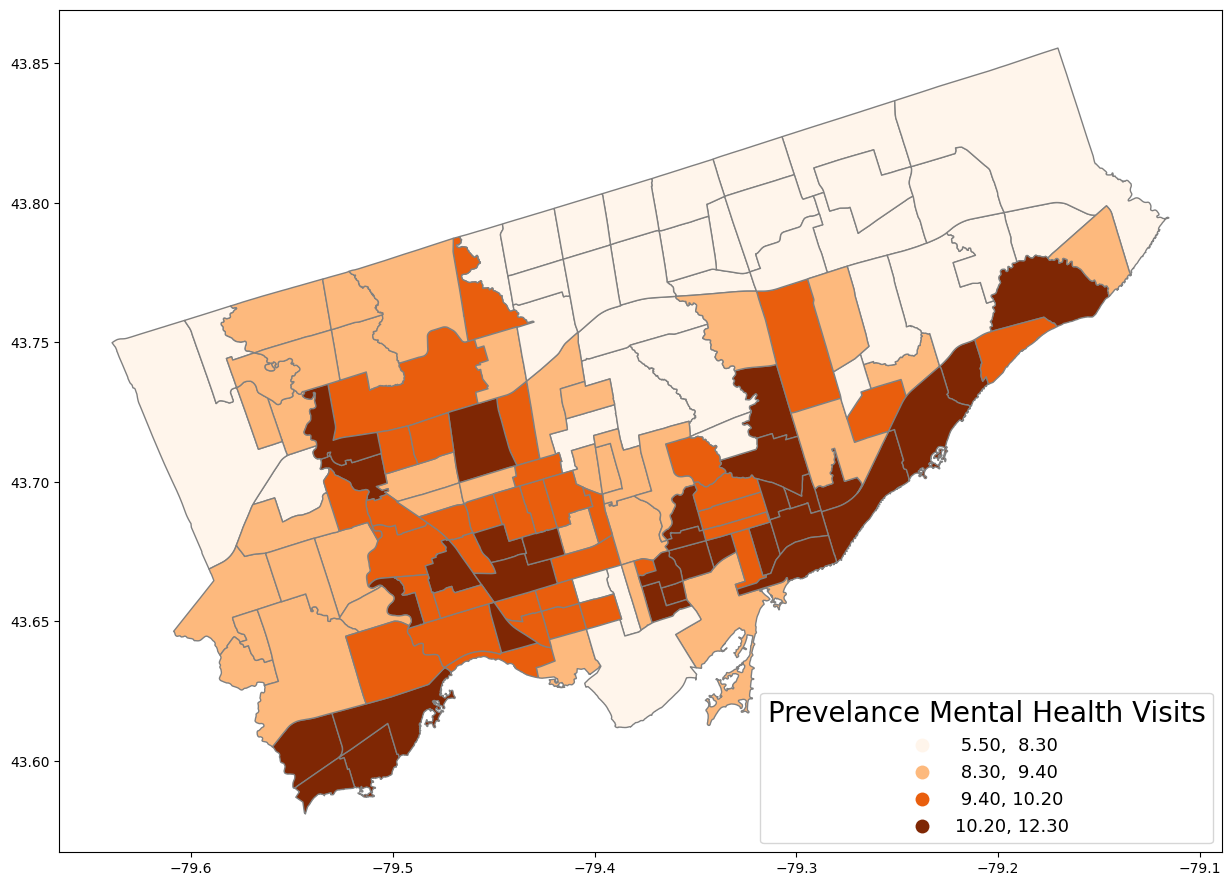

In [13]:
fig, axes = plt.subplots(1,1) #tell python we want to have more control over our figure
nbrhd_simple.plot(column='prev_mh_20up', scheme='quantiles', 
                  k=4, cmap='Oranges', edgecolor='grey', ax = axes, legend=True,
                  legend_kwds={'loc': 4, 'title': 'Prevelance Mental Health Visits',
                               'title_fontsize': 20,'fontsize': 13})
#we can make the map bigger!
current_fig = plt.gcf()
current_fig.set_size_inches(15,15)

We can also add multiple layers to a map! Let's add a file from Open Data Toronto to this map showing the locations of youth mental health services. https://open.toronto.ca/dataset/wellbeing-youth-health-services/ 

<Axes: >

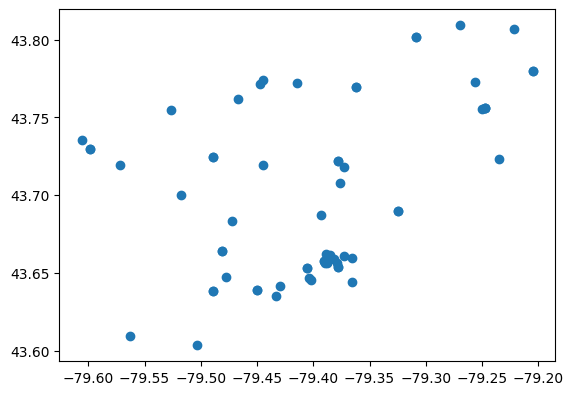

In [14]:
fig, axes = plt.subplots(1,1) #tell python we want to have more control over our figure
mh_services = gpd.read_file("Health Services.geojson")
mh_services.plot(ax=axes)

How do we combine these maps? Well we tell python to first plot the neighborhood map and THEN we tell it to plot the map of health services points all on the SAME axes.

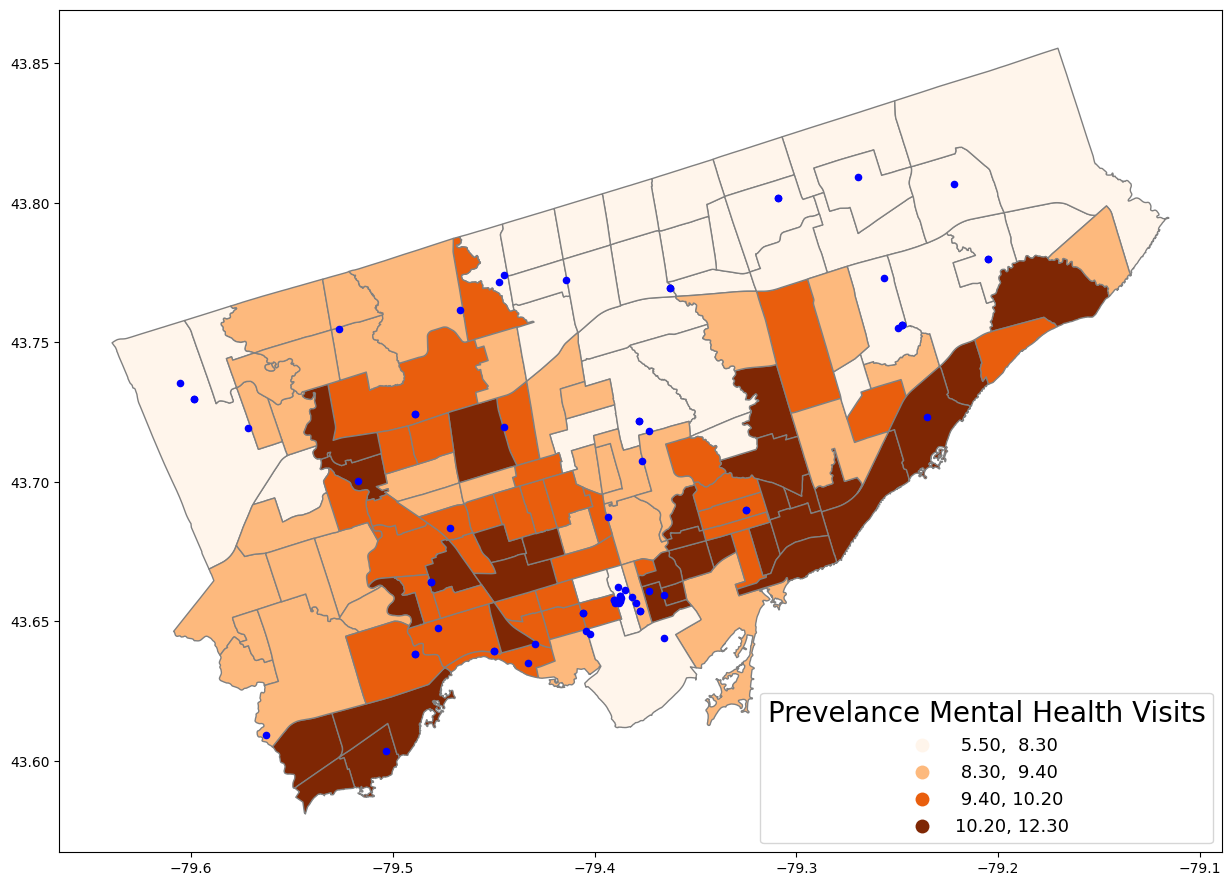

In [15]:
fig, axes = plt.subplots(1,1) #tell python we want to have more control over our figure

nbrhd_simple.plot(column='prev_mh_20up', scheme='quantiles', 
                  k=4, cmap='Oranges', edgecolor='grey', ax=axes, legend=True,
                  legend_kwds={'loc': 4, 'title': 'Prevelance Mental Health Visits',
                               'title_fontsize': 20,'fontsize': 13})
mh_services.plot(markersize=20, color='blue', ax = axes)

#we can make the map bigger!
current_fig = plt.gcf()
current_fig.set_size_inches(15,15)

Now you try! Can you make a map of diabetes in 20+ year olds in Toronto? Can you classify your neighbourhoods using 'quantiles' in 5 categories instead of 4? Give it a try!